In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

ticker="CL=F"

import pandas as pd 

data=yf.download(ticker, start='2023-05-20', end='2023-07-20')

data.head()

x=data['Close']

type(x)

y=x.values
type(y)


[*********************100%***********************]  1 of 1 completed


numpy.ndarray

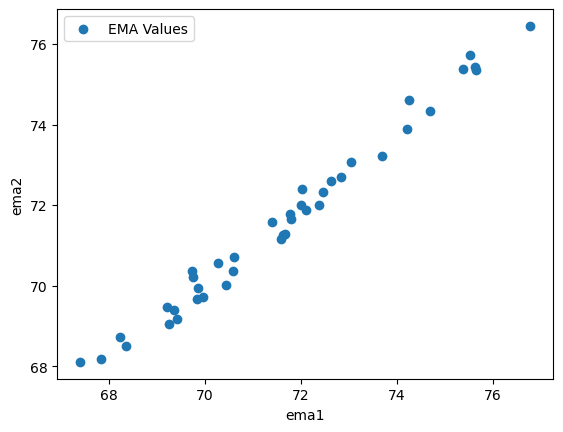

In [59]:
# create a dataframe
stockValues = pd.DataFrame(
    {'Stock_Values': y })
 
# finding EMA
# use any constant value that results in
# good smoothened curve
ema1 = stockValues.ewm(com=0.09).mean()
ema2 = stockValues.ewm(com=0.40).mean() 
# Comparison plot b/w stock values & EMA
#plt.plot(stockValues, label="Stock Values")
plt.scatter(ema1, ema2, label="EMA Values")

plt.xlabel("ema1")
plt.ylabel("ema2")
plt.legend()
plt.show()

In [60]:
new=pd.DataFrame(ema1)
new['ema2']=ema2
new.rename(columns={'Stock_Values':'ema1'} )
new['const']=1
X=['const','ema2']
Y=[new['Stock_Values']]


                            OLS Regression Results                            
Dep. Variable:                   ema2   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     2405.
Date:                Thu, 27 Jul 2023   Prob (F-statistic):           5.73e-36
Time:                        12:59:12   Log-Likelihood:                -5.3653
No. Observations:                  40   AIC:                             14.73
Df Residuals:                      38   BIC:                             18.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.3560      1.372      3.175   

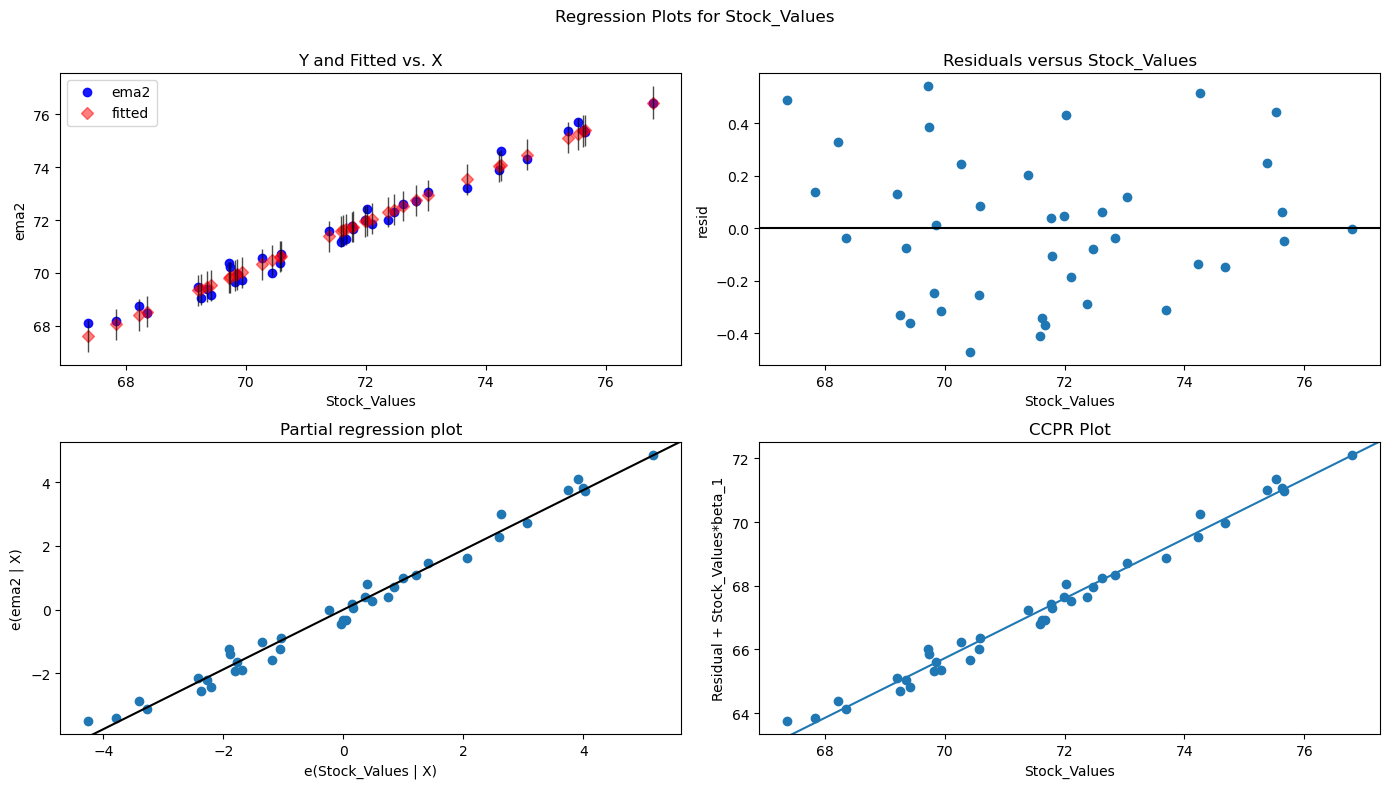

In [61]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
  
# reading the csv file
# data = pd.read_csv('headbrain3.csv')
  
# fit simple linear regression model
linear_model = ols("ema2 ~ Stock_Values", data=new).fit()
  
# display model summary
print(linear_model.summary())
  
# modify figure size
fig = plt.figure(figsize=(14, 8))
  
# creating regression plots
fig = sm.graphics.plot_regress_exog(linear_model,
                                    1,
                                    fig=fig)

In [62]:
ans=linear_model.resid

In [63]:
ans

0     0.045861
1    -0.036452
2    -0.133987
3     0.432900
4     0.063854
5     0.541384
6     0.327862
7    -0.313746
8    -0.410105
9    -0.183887
10    0.038707
11   -0.077540
12    0.204561
13    0.243866
14    0.490613
15   -0.328363
16   -0.036321
17   -0.470200
18   -0.367727
19    0.085526
20   -0.287987
21    0.387700
22    0.131727
23   -0.074855
24    0.139971
25   -0.362039
26   -0.248064
27   -0.252809
28    0.013699
29   -0.341188
30   -0.105409
31   -0.311252
32    0.120772
33   -0.148629
34   -0.049024
35   -0.001473
36    0.443166
37    0.517486
38    0.061449
39    0.249954
dtype: float64

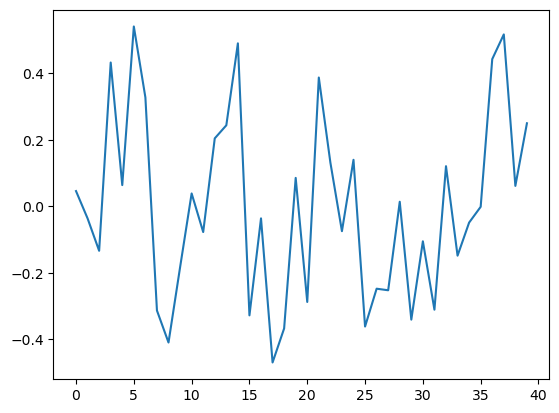

In [64]:
plt.plot(ans)

In [65]:
from statsmodels.tsa.stattools import adfuller

In [66]:
result = adfuller(ans)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.875528
p-value: 0.002223
Critical Values:
	1%: -3.627
	5%: -2.946
	10%: -2.612


In [67]:
import math 
spread= (ema1)-(ema2)

In [68]:
import scipy.stats as stats

res=stats.zscore(spread)

In [69]:
res

,Stock_Values,const,ema2
0,-0.076147,NaN,NaN
1,0.354725,NaN,NaN
2,0.937889,NaN,NaN
3,-1.310845,NaN,NaN
4,-0.010881,NaN,NaN
5,-2.111468,NaN,NaN
6,-1.719834,NaN,NaN
7,0.676572,NaN,NaN
8,1.308854,NaN,NaN
9,0.683432,NaN,NaN


In [70]:
res["Stock_Values"]

0    -0.076147
1     0.354725
2     0.937889
3    -1.310845
4    -0.010881
5    -2.111468
6    -1.719834
7     0.676572
8     1.308854
9     0.683432
10   -0.096347
11    0.413468
12   -0.703665
13   -1.048892
14   -2.407775
15    0.587389
16   -0.526418
17    1.274260
18    1.187969
19   -0.476839
20    1.069749
21   -1.613311
22   -0.897443
23   -0.205462
24   -1.193015
25    0.728050
26    0.441935
27    0.604136
28   -0.391917
29    1.095242
30    0.369225
31    1.403083
32   -0.109003
33    1.076291
34    0.948766
35    1.017250
36   -0.655889
37   -1.143317
38    0.587493
39   -0.067311
Name: Stock_Values, dtype: float64

In [71]:
ema1


,Stock_Values,ema2,const
0,71.989998,71.989998,1
1,72.839834,72.705558,1
2,74.216905,73.900893,1
3,72.026984,72.411762,1
4,72.616908,72.596568,1
5,69.720660,70.354942,1
6,68.224638,68.736872,1
7,69.945152,69.710577,1
8,71.591800,71.160182,1
9,72.103911,71.867198,1


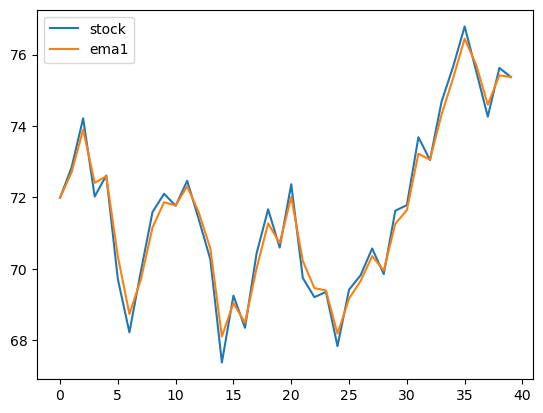

In [72]:
plt.plot(ema1["Stock_Values"])
plt.plot((ema2))
plt.legend(["stock","ema1","ema2"])

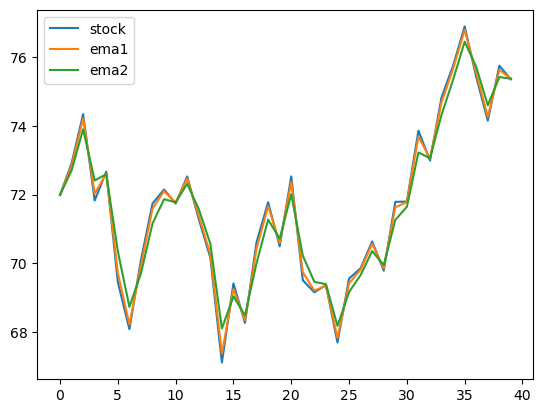

In [73]:
plt.plot(range(0,40),data['Close'])
plt.plot(ema1["Stock_Values"])
plt.plot((ema2))
plt.legend(["stock","ema1","ema2"])

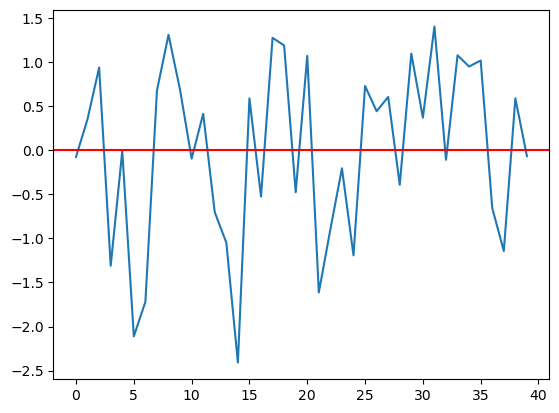

In [74]:
plt.plot(res)
plt.axhline(y=0, c='r')